**ImageDataGenerator**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
train='/content/drive/MyDrive/Data Set/training_set'
test='/content/drive/MyDrive/Data Set/test_set'

In [ ]:
x_train = train_datagen.flow_from_directory(train, target_size=(64,64), batch_size=300,
                                            class_mode="categorical", color_mode = "grayscale")

Found 15130 images belonging to 9 classes.


In [ ]:
x_test = test_datagen.flow_from_directory(test, target_size=(64,64), batch_size=300, class_mode="categorical", color_mode = "grayscale")

Found 2250 images belonging to 9 classes.


**Import Modules**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten

**Initialize model**

In [ ]:
model = Sequential()

**Convolution** **Layer**

In [ ]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,1), activation='relu'))
#no. of feature detectors, size of feature detector, image size, activation function

**Add The Pooling Layer**

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

**Add The Flatten Layer**

In [ ]:
model.add(Flatten())

**Adding The Dense Layers**

In [ ]:
model.add(Dense(units=512, activation='relu')) #Adding_The_Dense_Layers

In [ ]:
model.add(Dense(units=9,activation='softmax'))#Adding_The_Pooling_Layer

**Compile The Model**

In [ ]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 512)               15745536  
                                                                 
 dense_1 (Dense)             (None, 9)                 4617      
                                                                 
Total params: 15,750,473
Trainable params: 15,750,473
Non-trainable params: 0
____________________________________________

**Fit And Save The Model**

In [ ]:
model.fit_generator(x_train,steps_per_epoch=24,epochs=10,validation_data=x_test,validation_steps=40 )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
24/24 [==============================] - ETA: 0s - loss: 0.0080 - accuracy: 0.9982

24/24 [==============================] - 47s 2s/step - loss: 0.0080 - accuracy: 0.9982 - val_loss: 0.2387 - val_accuracy: 0.9764
Epoch 2/10
24/24 [==============================] - 39s 2s/step - loss: 0.0116 - accuracy: 0.9963
Epoch 3/10
24/24 [==============================] - 37s 2s/step - loss: 0.0091 - accuracy: 0.9981
Epoch 4/10
24/24 [==============================] - 39s 2s/step - loss: 0.0061 - accuracy: 0.9990
Epoch 5/10
24/24 [==============================] - 37s 1s/step - loss: 0.0044 - accuracy: 0.9993
Epoch 6/10
24/24 [==============================] - 39s 2s/step - loss: 0.0040 - accuracy: 0.9996
Epoch 7/10
24/24 [==============================] - 37s 2s/step - loss: 0.0075 - accuracy: 0.9978
Epoch 8/10
24/24 [==============================] - 42s 2s/step - loss: 0.0040 - accuracy: 0.9986
Epoch 9/10
24/24 [==============================] - 39s 2s/step - loss: 0.0054 - accuracy: 0.9989
Epoch 10/10
24/24 [==============================] - 37s 2s/step - loss: 0.0021 - accur

In [ ]:
model.save("IBM.h5")

**Import The Packages And Load The Saved Model**

In [ ]:
from keras.models import load_model
import cv2 , numpy as np

In [25]:
model=load_model(r'/content/drive/MyDrive/conversation engine for deaf and dumb/asl_model.h5')

**Load The Test Image, Pre-Process It And Predict**

In [ ]:
from skimage.transform import resize
from tensorflow.keras.preprocessing import image
op=['A','B','C','D','E','F','G','H','I']
def detect(frame):
    img=resize(frame,(64,64,1))
    img=image.img_to_array(img)
    img=np.expand_dims(img, axis=0)
    if(np.max(img)>1):
        img=img/255.0
    prediction=model.predict(img)
    
    prediction=model.predict_classes(img)
    print("The Letter is "+ op[prediction[0]])

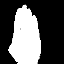

In [ ]:
frame=cv2.imread(r"/content/drive/MyDrive/Data Set/training_set/B/1000.png")
image.load_img(r"/content/drive/MyDrive/Data Set/training_set/B/1004.png")